In [1]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

%config InlineBackend.figure_formats = ['retina']

Populating the interactive namespace from numpy and matplotlib


## Central Limit Theorem

- How it works: 
    - Sample from a distribution k times; this can be from any kind of distribution, but let's call the distribution **D**
        - Take the mean (expectation) of those samples; now you have an estimate of the underlying distribution's mean
        - Call the set of samples $k_{1}$
        - $E(k_{1})$ = one sample mean of **D**
    - Take a second random sample, again of size k, from the same distribution **D**; compute that sample's mean 
        - Let's call this second sample $k_{2}$
        - $E(k_{2})$ = a second sample mean of **D**
    - Now you have two samples of the underlying distribution's mean (each sample is size k, and both are coming from distribution **D**)
        - We have $E(k_{1})$ and $E(k_{2})$ from **D**
    - Keep taking samples (up to n) of size k from distribution **D**
        - e.g. $E(k_{1})$, $E(k_{2})$, $E(k_{3})$, $E(k_{4})$
        - Call the number of samples n, so we have n = 4 now
    - Now you have n samples, where each sample is made up of k elements, that represent an estimate of distribution **D**'s mean
    - CLT says that the distribution of n will now be approximately normal (and actually normal in the limit, when we take infinite samples)

## Example drawing from a uniform distribution

In [2]:
uniform_draws = np.random.uniform(1,10,(10,4))
# draw from a uniform distribution 10 times, and take 4 samples each time

uniform_draws

array([[9.98635808, 2.71139256, 6.55723173, 8.80735562],
       [2.68632577, 4.04932177, 6.23337106, 2.96360929],
       [2.46695497, 4.3599708 , 9.85528714, 7.77585894],
       [9.55126349, 5.21697167, 3.20113759, 3.08878007],
       [1.24515638, 9.0163524 , 9.58844914, 3.60079563],
       [4.52809483, 3.40768647, 1.60680255, 1.22279113],
       [6.33523779, 6.16172772, 4.2400627 , 5.50858552],
       [2.55479605, 7.15358762, 3.3525509 , 8.90247502],
       [5.23858198, 1.55465177, 2.64630819, 5.60671219],
       [5.82544494, 3.42828443, 2.42960355, 8.99989068]])

In [3]:
sample_means = np.mean(uniform_draws, axis=1) 
# calculate the mean of each sample
# (where a sample is a four-element array)
 
sample_means

array([7.0155845 , 3.98315697, 6.11451796, 5.26453821, 5.86268839,
       2.69134374, 5.56140343, 5.4908524 , 3.76156353, 5.1708059 ])

In [6]:
sample_means.mean() # now take the expectation of the 10 means

5.501024063685974

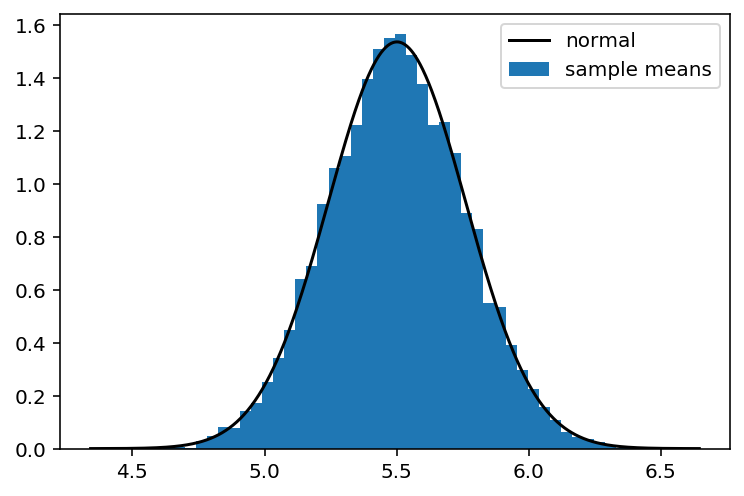

In [7]:
# Now let's run this for many more samples and plot the means
import scipy.stats as stats

uniform_draws = np.random.uniform(1, 10, (10**4, 100))
sample_means = np.mean(uniform_draws, axis=1)

plt.hist(
    sample_means, bins=50, density=True, label="sample means");
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
y = stats.norm.pdf(x,np.mean(sample_means),np.std(sample_means))
plt.plot(x,y,'k',label="normal");
plt.legend();

## In conclusion

- Note that we originally drew from a **uniform** distribution! 
- Then we took a bunch of samples of size 500 and took the mean of each sample
- The distribution of our sample means looks **normal**! That's the CLT

# You Code

Try this with a different distribution. Are there any that you expect will not follow the CLT?